In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('~/Downloads/conversion_data.csv')
df['country'] = df['country'].astype('category')
df['source'] = df['source'].astype('category')

In [4]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


The max age is 123, but the 75% age is only 36.

In [5]:
sorted(df['age'],reverse=True)[:10]

[123, 111, 79, 77, 73, 72, 70, 70, 69, 69]

There are two unrealistic ages (123 and 111) so I will remove them.

The average conversion rate is 3%.

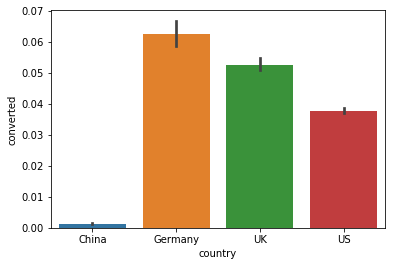

In [6]:
sns.barplot(x='country',y='converted',data=df)

The Chinese users are converting at a significantly lower rate than users from other countries.

In [7]:
data_pages = df.groupby('total_pages_visited')[['converted']].mean()

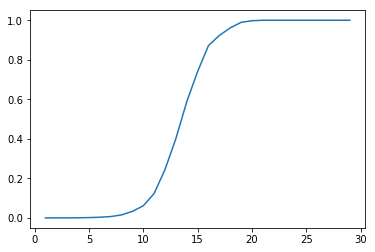

In [8]:
plt.plot(data_pages.index,data_pages['converted'])

In [9]:
df_country = pd.get_dummies(df['country'])
df = pd.concat([df, df_country], axis=1)
df_source = pd.get_dummies(df['source'])
df = pd.concat([df, df_source], axis=1)
df.head()

,country,age,new_user,source,total_pages_visited,converted,China,Germany,UK,US,Ads,Direct,Seo
0,UK,25,1,Ads,1,0,0,0,1,0,1,0,0
1,US,23,1,Seo,5,0,0,0,0,1,0,0,1
2,US,28,1,Seo,4,0,0,0,0,1,0,0,1
3,China,39,1,Seo,5,0,1,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,0,1,0,0,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[['total_pages_visited','China','Germany','UK','US','Ads','Direct','Seo','age','new_user']], df['converted'], test_size=0.33, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, np.array(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
forest.score(X_test,y_test)

0.98436930979625481

The accuracy on the test set is 98%, the baseline accuracy is:

In [29]:
1-sum(df['converted'])/len(df['converted'])

0.967741935483871

Feature ranking:
1. feature 0 (0.809667)
2. feature 8 (0.114073)
3. feature 9 (0.038737)
4. feature 1 (0.020798)
5. feature 4 (0.003662)
6. feature 2 (0.003090)
7. feature 7 (0.002851)
8. feature 5 (0.002533)
9. feature 6 (0.002339)
10. feature 3 (0.002249)


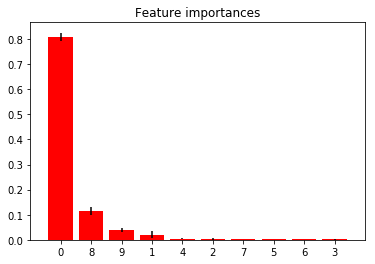

In [26]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The most important feature is total_pages_visited. However, it is difficult for the company to cause people to visit more pages. Also, people probably visit more pages to buy things anyway, so it is probably caused by the action of a purchase, rather than causing a purchase.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[['China','Germany','UK','US','Ads','Direct','Seo','age','new_user']], df['converted'], test_size=0.33, random_state=42)
forest = RandomForestClassifier(random_state=42,class_weight={0: 0.7, 1: 0.3})
forest.fit(X_train, np.array(y_train))

RandomForestClassifier(bootstrap=True, class_weight={0: 0.7, 1: 0.3},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [34]:
forest.score(X_test,y_test)

0.9685565330726621

The accuracy on the test set is now similar to the baseline accuracy.

Feature ranking:
1. feature 8 (0.404159)
2. feature 7 (0.347301)
3. feature 0 (0.137011)
4. feature 2 (0.035515)
5. feature 3 (0.028407)
6. feature 1 (0.024451)
7. feature 5 (0.008243)
8. feature 4 (0.007547)
9. feature 6 (0.007366)


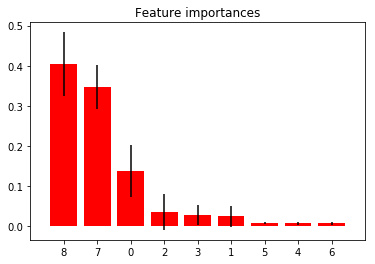

In [35]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

After removing the `total_pages_visited` the most important feature is now whether the user is a new user or not.

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
forest = GradientBoostingRegressor(n_estimators=100, max_depth=4,
                                    learning_rate=0.1, loss='huber',
                                    random_state=1)
forest.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

/home/rebecca/anaconda3/envs/my_projects_env/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


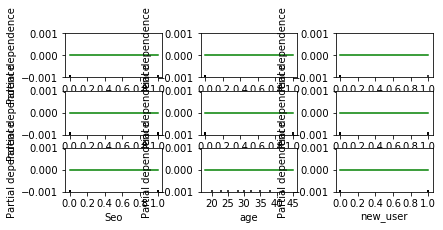

In [43]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
fig, axs = plot_partial_dependence(forest, X_train, [0,1,2,3,4,5,6,7,8],
                                       feature_names=['China','Germany','UK','US','Ads','Direct','Seo','age','new_user'],
                                       n_jobs=3, grid_resolution=50)